In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [15]:
# baja y lee los datos
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

In [26]:
# Selecciona y normaliza 600 para entrenar
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()


mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)



torch.Size([600, 28, 28])

In [17]:
#hidden_size = 20
#net = torch.nn.Sequential(
#                torch.nn.Conv2d(1,4,4),
#                torch.nn.ReLU(),
#                torch.nn.Conv2d(hidden_size, 10)
#)
#criterion = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2) #lr: learning rate

In [143]:
X_new = train.unsqueeze(1)

#X_new = np.expand_dims(x_train, 1) # necesario para que las dimensiones sean [batch, channel, width]
feature_maps = torch.autograd.Variable(torch.Tensor(X_new).float())
print(feature_maps.size())


n = torch.nn.Conv2d(1,4, 4, stride=1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.MaxPool2d(kernel_size=2)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.Conv2d(4, 20, 4)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.MaxPool2d(kernel_size=3)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.Flatten(1,-1)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.Linear(180, 12)
feature_maps = n(feature_maps)
print(feature_maps.size())



torch.Size([600, 1, 28, 28])
torch.Size([600, 4, 25, 25])
torch.Size([600, 4, 12, 12])
torch.Size([600, 20, 9, 9])
torch.Size([600, 20, 3, 3])
torch.Size([600, 180])
torch.Size([600, 12])


In [144]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 4, kernel_size=4, stride=1),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(4, 20, kernel_size=4),
    torch.nn.MaxPool2d(kernel_size=3),
    torch.nn.Flatten(1,-1),
    torch.nn.Linear(180, 12),
    
)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #lr: learning rate
epochs = 60
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)
F1_values_test = np.zeros(epochs)

for epoch in range(epochs):
    X_new = np.expand_dims(train, 1) 
    inputs = torch.autograd.Variable(torch.Tensor(X_new).float())
    targets = torch.autograd.Variable(torch.Tensor(target).long())
    
    optimizer.zero_grad()
    out = model(inputs)
    out = out.squeeze(dim=1) # necesario para quitar la dimension intermedia de channel
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(target, Y_predicted, average='macro')
    

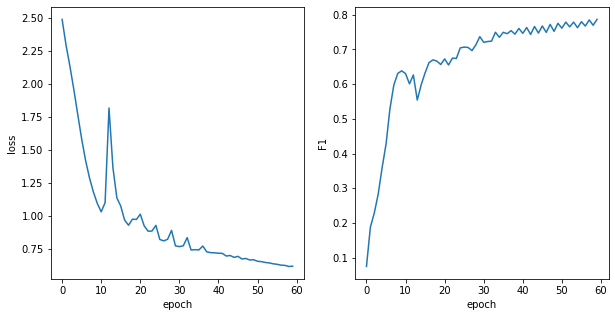

In [145]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(np.arange(epochs), F1_values_train)
plt.xlabel('epoch')
plt.ylabel('F1')
plt.show()